# FloPy shapefile export demo
The goal of this notebook is to demonstrate ways to export model information to shapefiles.
This example will cover:
* basic exporting of information for a model, individual package, or dataset
* custom exporting of combined data from different packages
* general exporting and importing of geographic data from other sources

In [1]:
import sys
import os
from tempfile import TemporaryDirectory

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# run installed version of flopy or add local path
try:
    import flopy
except:
    fpth = os.path.abspath(os.path.join("..", ".."))
    sys.path.append(fpth)
    import flopy

print(sys.version)
print("numpy version: {}".format(np.__version__))
print("matplotlib version: {}".format(mpl.__version__))
print("flopy version: {}".format(flopy.__version__))

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
numpy version: 1.21.5
matplotlib version: 3.4.3
flopy version: 3.3.7


In [2]:
# temporary directory
temp_dir = TemporaryDirectory()
outdir = os.path.join(temp_dir.name, "shapefile_export")

# load an existing model
model_ws = "../data/freyberg"
m = flopy.modflow.Modflow.load(
    "freyberg.nam",
    model_ws=model_ws,
    verbose=False,
    check=False,
    exe_name="mfnwt",
)

In [3]:
m.get_package_list()

['DIS', 'BAS6', 'LPF', 'WEL', 'RIV', 'RCH', 'OC', 'PCG']

### set the model coordinate information
the coordinate information where the grid is located in a projected coordinate system (e.g. UTM)

In [4]:
grid = m.modelgrid
grid.set_coord_info(xoff=273170, yoff=5088657, epsg=26916)

In [5]:
grid.extent

(273170.0, 278170.0, 5088657.0, 5098657.0)

## Declarative export using attached `.export()` methods
#### Export the whole model to a single shapefile

In [6]:
fname = "{}/model.shp".format(outdir)
m.export(fname)

wrote ..\..\..\..\AppData\Local\Temp\7\tmpans1w964\shapefile_export\model.shp
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A6BB1600>)
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A6BB42C0>)
No internet connection or epsg code 26916 not found at:
   1: https://spatialreference.org/ref/epsg/26916/esriwkt/
   2: https://spatialreference.org/ref/esri/26916/esriwkt/

(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A6BB4FC0>)
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FA

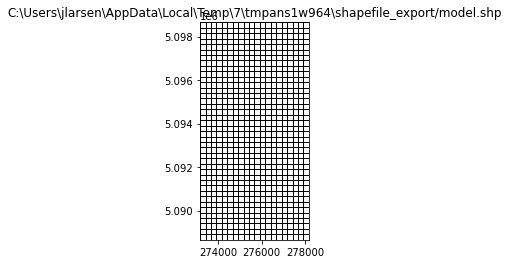

In [7]:
ax = plt.subplot(1, 1, 1, aspect="equal")
extents = grid.extent
pc = flopy.plot.plot_shapefile(fname, ax=ax, edgecolor="k", facecolor="none")
ax.set_xlim(extents[0], extents[1])
ax.set_ylim(extents[2], extents[3])
ax.set_title(fname);

In [8]:
fname = "{}/wel.shp".format(outdir)
m.wel.export(fname)

wrote ..\..\..\..\AppData\Local\Temp\7\tmpans1w964\shapefile_export\wel.shp
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A75C9040>)
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A75C9CC0>)
No internet connection or epsg code 26916 not found at:
   1: https://spatialreference.org/ref/epsg/26916/esriwkt/
   2: https://spatialreference.org/ref/esri/26916/esriwkt/

(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A75CDD00>)
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAIL

### Export a package to a shapefile

### Export a FloPy list or array object

In [9]:
m.lpf.hk

In [10]:
fname = "{}/hk.shp".format(outdir)
m.lpf.hk.export("{}/hk.shp".format(outdir))

wrote ..\..\..\..\AppData\Local\Temp\7\tmpans1w964\shapefile_export\hk.shp
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A75FB280>)
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A75FBF40>)
No internet connection or epsg code 26916 not found at:
   1: https://spatialreference.org/ref/epsg/26916/esriwkt/
   2: https://spatialreference.org/ref/esri/26916/esriwkt/



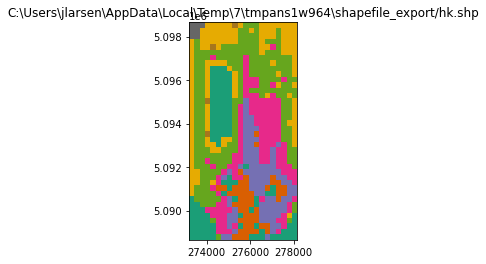

In [11]:
ax = plt.subplot(1, 1, 1, aspect="equal")
extents = grid.extent
a = m.lpf.hk.array.ravel()
pc = flopy.plot.plot_shapefile(fname, ax=ax, a=a)
ax.set_xlim(extents[0], extents[1])
ax.set_ylim(extents[2], extents[3])
ax.set_title(fname);

In [12]:
m.riv.stress_period_data

In [13]:
m.riv.stress_period_data.export("{}/riv_spd.shp".format(outdir))

wrote ..\..\..\..\AppData\Local\Temp\7\tmpans1w964\shapefile_export\riv_spd.shp
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A76F9580>)
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A76FD4C0>)
No internet connection or epsg code 26916 not found at:
   1: https://spatialreference.org/ref/epsg/26916/esriwkt/
   2: https://spatialreference.org/ref/esri/26916/esriwkt/



### MfList.export() exports the whole grid by default, regardless of the locations of the boundary cells
`sparse=True` only exports the boundary cells in the MfList

In [14]:
m.riv.stress_period_data.export("{}/riv_spd.shp".format(outdir), sparse=True)

(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A76BCCC0>)
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A7578900>)
No internet connection or epsg code 26916 not found at:
   1: https://spatialreference.org/ref/epsg/26916/esriwkt/
   2: https://spatialreference.org/ref/esri/26916/esriwkt/

wrote ..\..\..\..\AppData\Local\Temp\7\tmpans1w964\shapefile_export\riv_spd.shp


In [15]:
m.wel.stress_period_data.export("{}/wel_spd.shp".format(outdir), sparse=True)

(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A76EF8C0>)
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A76BDCC0>)
No internet connection or epsg code 26916 not found at:
   1: https://spatialreference.org/ref/epsg/26916/esriwkt/
   2: https://spatialreference.org/ref/esri/26916/esriwkt/

wrote ..\..\..\..\AppData\Local\Temp\7\tmpans1w964\shapefile_export\wel_spd.shp


## Ad-hoc exporting using `recarray2shp`
* The main idea is to create a recarray with all of the attribute information, and a list of geometry features (one feature per row in the recarray)
* each geometry feature is an instance of the `Point`, `LineString` or `Polygon` classes in `flopy.utils.geometry`. The shapefile format requires all the features to be of the same type.
* We will use pandas dataframes for these examples because they are easy to work with, and then convert them to recarrays prior to exporting.


In [16]:
from flopy.export.shapefile_utils import recarray2shp

### combining data from different packages
write a shapefile of RIV and WEL package cells

In [17]:
wellspd = pd.DataFrame(m.wel.stress_period_data[0])
rivspd = pd.DataFrame(m.riv.stress_period_data[0])
spd = pd.concat([wellspd, rivspd])
spd.head()

,k,i,j,flux,iface,stage,cond,rbot
0,0,8,15,-0.00820,0.0,NaN,NaN,NaN
1,0,10,12,-0.00410,0.0,NaN,NaN,NaN
2,0,19,13,-0.00390,0.0,NaN,NaN,NaN
3,0,25,9,-0.00083,0.0,NaN,NaN,NaN
4,0,28,5,-0.00072,0.0,NaN,NaN,NaN


##### Create a list of Polygon features from the cell vertices stored in the modelgrid object

In [18]:
from flopy.utils.geometry import Polygon

vertices = []
for row, col in zip(spd.i, spd.j):
    vertices.append(grid.get_cell_vertices(row, col))
polygons = [Polygon(vrt) for vrt in vertices]
polygons

##### write the shapefile

In [19]:
fname = "{}/bcs.shp".format(outdir)
recarray2shp(spd.to_records(), geoms=polygons, shpname=fname, epsg=grid.epsg)

(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A7705F00>)
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A7706100>)
No internet connection or epsg code 26916 not found at:
   1: https://spatialreference.org/ref/epsg/26916/esriwkt/
   2: https://spatialreference.org/ref/esri/26916/esriwkt/

wrote ..\..\..\..\AppData\Local\Temp\7\tmpans1w964\shapefile_export\bcs.shp


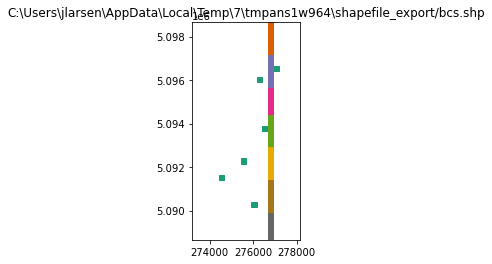

In [20]:
ax = plt.subplot(1, 1, 1, aspect="equal")
extents = grid.extent
pc = flopy.plot.plot_shapefile(fname, ax=ax)
ax.set_xlim(extents[0], extents[1])
ax.set_ylim(extents[2], extents[3])
ax.set_title(fname);

### exporting other data
Suppose we have some well data with actual locations that we want to export to a shapefile

In [21]:
welldata = pd.DataFrame(
    {
        "wellID": np.arange(0, 10),
        "q": np.random.randn(10) * 100 - 1000,
        "x_utm": np.random.rand(10) * 5000 + grid.xoffset,
        "y_utm": grid.yoffset + np.random.rand(10) * 10000,
    }
)
welldata.head()

,wellID,q,x_utm,y_utm
0,0,-999.733676,276988.146283,5.095459e+06
1,1,-1023.358866,275337.797873,5.097697e+06
2,2,-1067.785328,273807.492363,5.090774e+06
3,3,-1006.783902,277487.137547,5.091920e+06
4,4,-855.665914,274433.886396,5.094553e+06


##### convert the x, y coorindates to point features and then export

In [22]:
from flopy.utils.geometry import Point

geoms = [Point(x, y) for x, y in zip(welldata.x_utm, welldata.y_utm)]

fname = "{}/wel_data.shp".format(outdir)
recarray2shp(welldata.to_records(), geoms=geoms, shpname=fname, epsg=grid.epsg)

(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A77321C0>)
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A773F080>)
No internet connection or epsg code 26916 not found at:
   1: https://spatialreference.org/ref/epsg/26916/esriwkt/
   2: https://spatialreference.org/ref/esri/26916/esriwkt/

wrote ..\..\..\..\AppData\Local\Temp\7\tmpans1w964\shapefile_export\wel_data.shp


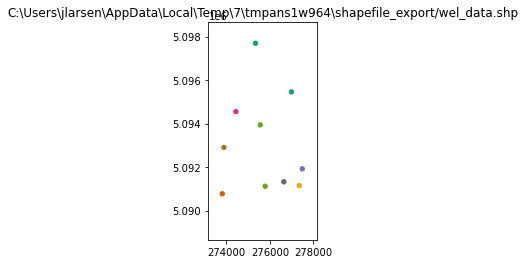

In [23]:
ax = plt.subplot(1, 1, 1, aspect="equal")
extents = grid.extent
pc = flopy.plot.plot_shapefile(fname, ax=ax, radius=100)
ax.set_xlim(extents[0], extents[1])
ax.set_ylim(extents[2], extents[3])
ax.set_title(fname);

### Adding attribute data to an existing shapefile
Suppose we have a GIS coverage representing the river in the riv package

In [24]:
from flopy.utils.geometry import LineString

### make up a linestring shapefile of the river reaches
i, j = m.riv.stress_period_data[0].i, m.riv.stress_period_data[0].j
x0 = grid.xyzcellcenters[0][i[0], j[0]]
x1 = grid.xyzcellcenters[0][i[-1], j[-1]]
y0 = grid.xyzcellcenters[1][i[0], j[0]]
y1 = grid.xyzcellcenters[1][i[-1], j[-1]]
x = np.linspace(x0, x1, m.nrow + 1)
y = np.linspace(y0, y1, m.nrow + 1)
l0 = zip(list(zip(x[:-1], y[:-1])), list(zip(x[1:], y[1:])))
lines = [LineString(l) for l in l0]

rivdata = pd.DataFrame(m.riv.stress_period_data[0])
rivdata["reach"] = np.arange(len(lines))
lines_shapefile = "{}/riv_reaches.shp".format(outdir)
recarray2shp(
    rivdata.to_records(index=False),
    geoms=lines,
    shpname=lines_shapefile,
    epsg=grid.epsg,
)

(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A77C6B80>)
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A77C7180>)
No internet connection or epsg code 26916 not found at:
   1: https://spatialreference.org/ref/epsg/26916/esriwkt/
   2: https://spatialreference.org/ref/esri/26916/esriwkt/

wrote ..\..\..\..\AppData\Local\Temp\7\tmpans1w964\shapefile_export\riv_reaches.shp


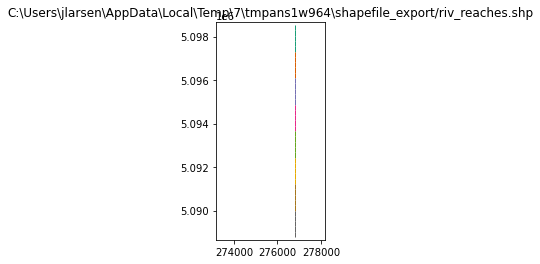

In [25]:
ax = plt.subplot(1, 1, 1, aspect="equal")
extents = grid.extent
pc = flopy.plot.plot_shapefile(lines_shapefile, ax=ax, radius=25)
ax.set_xlim(extents[0], extents[1])
ax.set_ylim(extents[2], extents[3])
ax.set_title(lines_shapefile);

#### read in the GIS coverage using `shp2recarray`
`shp2recarray` reads a shapefile into a numpy record array, which can easily be converted to a DataFrame

In [26]:
from flopy.export.shapefile_utils import shp2recarray

In [27]:
linesdata = shp2recarray(lines_shapefile)
linesdata = pd.DataFrame(linesdata)
linesdata.head()

,k,i,j,stage,cond,rbot,iface,reach,geometry
0,0,0,14,20.100000,0.05,20.00,0.0,0,<flopy.utils.geometry.LineString object at 0x0...
1,0,1,14,19.870001,0.05,19.75,0.0,1,<flopy.utils.geometry.LineString object at 0x0...
2,0,2,14,19.650000,0.05,19.50,0.0,2,<flopy.utils.geometry.LineString object at 0x0...
3,0,3,14,19.420000,0.05,19.25,0.0,3,<flopy.utils.geometry.LineString object at 0x0...
4,0,4,14,19.190001,0.05,19.00,0.0,4,<flopy.utils.geometry.LineString object at 0x0...


##### Suppose we have some flow information that we read in from the cell budget file

In [28]:
# make up some fluxes between the river and aquifer at each reach
q = np.random.randn(len(linesdata)) + 1
q

array([ 2.19335104,  1.01258649,  1.68770039,  3.42536447,  1.74609065,
        1.93715985,  2.43374294,  0.40827816, -0.20027034,  0.49028629,
        2.96313031,  0.70164773,  0.69893149,  0.29111335, -0.26914186,
        0.17959029,  2.17316055, -0.46246826, -0.08900208,  1.78608443,
        0.99853366,  1.44523628,  1.43377298,  1.24799312,  0.96469328,
        0.9556186 ,  3.76515541,  1.0368278 ,  0.91899585,  1.96186746,
        1.18729052, -0.48379268,  1.50735804,  1.02965308, -0.56187599,
        2.22351483,  1.06091157,  0.94455071,  0.78668145,  1.36582065])

##### Add reachs fluxes and cumulative flow to lines DataFrame

In [29]:
linesdata["qreach"] = q
linesdata["qstream"] = np.cumsum(q)

In [30]:
recarray2shp(
    linesdata.drop("geometry", axis=1).to_records(),
    geoms=linesdata.geometry.values,
    shpname=lines_shapefile,
    epsg=grid.epsg,
)

(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A73B9680>)
(<class 'urllib.error.URLError'>, URLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')), <traceback object at 0x000001A3A73B9800>)
No internet connection or epsg code 26916 not found at:
   1: https://spatialreference.org/ref/epsg/26916/esriwkt/
   2: https://spatialreference.org/ref/esri/26916/esriwkt/

wrote ..\..\..\..\AppData\Local\Temp\7\tmpans1w964\shapefile_export\riv_reaches.shp


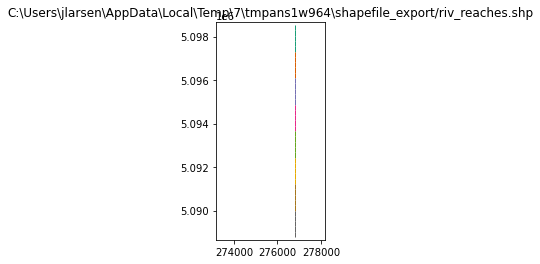

In [31]:
ax = plt.subplot(1, 1, 1, aspect="equal")
extents = grid.extent
pc = flopy.plot.plot_shapefile(lines_shapefile, ax=ax, radius=25)
ax.set_xlim(extents[0], extents[1])
ax.set_ylim(extents[2], extents[3])
ax.set_title(lines_shapefile);

## Overriding the model's modelgrid with a user supplied modelgrid

In some cases it may be necessary to override the model's modelgrid instance with a seperate modelgrid. An example of this is if the model discretization is in feet and the user would like it projected in meters. Exporting can be accomplished by supplying a modelgrid as a `kwarg` in any of the `export()` methods within flopy. Below is an example:

In [32]:
mg0 = m.modelgrid

# build a new modelgrid instance with discretization in meters
modelgrid = flopy.discretization.StructuredGrid(
    delc=mg0.delc * 0.3048,
    delr=mg0.delr * 0.3048,
    top=mg0.top,
    botm=mg0.botm,
    idomain=mg0.idomain,
    xoff=mg0.xoffset * 0.3048,
    yoff=mg0.yoffset * 0.3048,
)

# exporting an entire model
m.export("{}/freyberg.shp".format(outdir), modelgrid=modelgrid)

wrote ..\..\..\..\AppData\Local\Temp\7\tmpans1w964\shapefile_export\freyberg.shp


And for a specific parameter the method is the same

In [33]:
fname = "{}/hk.shp".format(outdir)
m.lpf.hk.export(fname, modelgrid=modelgrid)

wrote ..\..\..\..\AppData\Local\Temp\7\tmpans1w964\shapefile_export\hk.shp


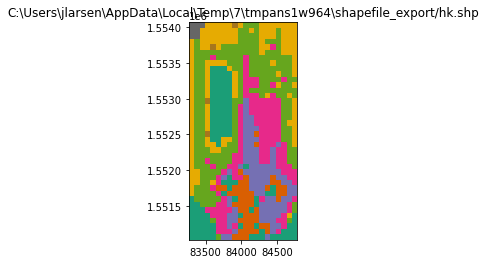

In [34]:
ax = plt.subplot(1, 1, 1, aspect="equal")
extents = modelgrid.extent
a = m.lpf.hk.array.ravel()
pc = flopy.plot.plot_shapefile(fname, ax=ax, a=a)
ax.set_xlim(extents[0], extents[1])
ax.set_ylim(extents[2], extents[3])
ax.set_title(fname);

In [35]:
try:
    # ignore PermissionError on Windows
    temp_dir.cleanup()
except:
    pass
